In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

## 1

In [3]:
df = pd.read_csv("nfl_draft.csv")
df

,column_a,player_id,year,rnd,pick,tm,player,hof,pos,position_standard,...,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,sk,college_univ
0,2015Jameis Winston,WinsJa00,2015,1,1,TAM,Jameis Winston,No,QB,QB,...,86.0,311.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Florida St.
1,2015Marcus Mariota,MariMa01,2015,1,2,TEN,Marcus Mariota,No,QB,QB,...,79.0,516.0,4.0,1.0,41.0,1.0,NaN,NaN,NaN,Oregon
2,2015Dante Fowler,FowlDa00,2015,1,3,JAX,Dante Fowler,No,OLB,LB,...,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,2.5,Florida
3,2015Amari Cooper,CoopAm00,2015,1,4,OAK,Amari Cooper,No,WR,WR,...,3.0,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,Alabama
4,2015Brandon Scherff,ScheBr00,2015,1,5,WAS,Brandon Scherff,No,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,1985Raymond Polk,NaN,1985,12,332,RAI,Raymond Polk,No,DB,DB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oklahoma St.,NaN
8431,1985Paul Woodside,NaN,1985,12,333,BUF,Paul Woodside,No,K,K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Virginia,NaN
8432,1985Dan Lynch,NaN,1985,12,334,DEN,Dan Lynch,No,G,G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Washington St.,NaN
8433,1985Ray Noble,NaN,1985,12,335,MIA,Ray Noble,No,DB,DB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,NaN


#  2

N/A

# 3

In [4]:
df.describe()

,year,rnd,pick,first4av,age,to,ap1,pb,st,carav,...,pass_td,pass_int,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int
count,8435.000000,8435.000000,8435.000000,8435.00000,7190.000000,7053.000000,8435.000000,8435.000000,8435.000000,7053.000000,...,594.000000,594.000000,1646.000000,1646.000000,1646.000000,2171.000000,2171.000000,2171.000000,4111.000000,1616.000000
mean,1999.197629,4.954001,139.141316,9.92709,22.639499,2004.610804,0.073622,0.275874,1.830587,17.276195,...,25.038721,18.915825,202.143378,827.727825,5.801944,105.699678,1243.660525,7.409949,86.745804,9.211943
std,9.180569,2.777415,83.237196,13.13477,0.844544,9.061308,0.465718,1.106443,2.972463,22.390409,...,63.515187,40.940416,453.280726,1914.291647,13.950791,170.804626,2237.914954,15.079805,149.519255,15.989047
min,1985.000000,1.000000,1.000000,-4.00000,20.000000,1985.000000,0.000000,0.000000,0.000000,-4.000000,...,0.000000,0.000000,0.000000,-36.000000,0.000000,0.000000,-19.000000,0.000000,1.000000,0.500000
25%,1991.000000,3.000000,69.000000,0.00000,22.000000,1997.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,3.000000,11.000000,0.000000,4.000000,41.000000,0.000000,4.000000,1.000000
50%,1999.000000,5.000000,137.000000,4.00000,23.000000,2006.000000,0.000000,0.000000,0.000000,8.000000,...,1.000000,1.000000,22.000000,94.000000,0.000000,34.000000,315.000000,1.000000,17.000000,3.500000
75%,2007.000000,7.000000,205.000000,16.00000,23.000000,2013.000000,0.000000,0.000000,3.000000,26.000000,...,12.750000,16.750000,179.750000,655.500000,5.000000,136.500000,1383.500000,8.000000,102.000000,10.000000
max,2015.000000,12.000000,336.000000,88.00000,29.000000,2016.000000,10.000000,14.000000,19.000000,177.000000,...,539.000000,336.000000,4409.000000,18355.000000,164.000000,1549.000000,22895.000000,197.000000,1562.000000,200.000000


In [5]:
df.shape

(8435, 34)

In [6]:
df.isnull().sum()

column_a                0
player_id            1219
year                    0
rnd                     0
pick                    0
tm                      0
player                  0
hof                     0
pos                     0
position_standard       0
first4av                0
age                  1245
to                   1382
ap1                     0
pb                      0
st                      0
carav                1382
drav                 2165
g                    1415
cmp                  7841
pass_att             7841
pass_yds             7841
pass_td              7841
pass_int             7841
rush_att             6789
rush_yds             6789
rush_tds             6789
rec                  6264
rec_yds              6264
rec_tds              6264
tkl                  4324
def_int              6819
sk                   4388
college_univ         3430
dtype: int64

In [7]:
#changes NA to 0 
columns_to_fill = ['g','cmp', 'pass_att','pass_yds','pass_td','pass_int','rush_att','rush_yds','rush_tds','rec','rec_yds','rec_tds','tkl','def_int','sk']


df[columns_to_fill] = df[columns_to_fill].fillna(0)

df

,column_a,player_id,year,rnd,pick,tm,player,hof,pos,position_standard,...,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,sk,college_univ
0,2015Jameis Winston,WinsJa00,2015,1,1,TAM,Jameis Winston,No,QB,QB,...,86.0,311.0,7.0,0.0,0.0,0.0,0.0,0.0,0,Florida St.
1,2015Marcus Mariota,MariMa01,2015,1,2,TEN,Marcus Mariota,No,QB,QB,...,79.0,516.0,4.0,1.0,41.0,1.0,0.0,0.0,0,Oregon
2,2015Dante Fowler,FowlDa00,2015,1,3,JAX,Dante Fowler,No,OLB,LB,...,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2.5,Florida
3,2015Amari Cooper,CoopAm00,2015,1,4,OAK,Amari Cooper,No,WR,WR,...,3.0,-3.0,0.0,134.0,1970.0,9.0,0.0,0.0,0,Alabama
4,2015Brandon Scherff,ScheBr00,2015,1,5,WAS,Brandon Scherff,No,T,T,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Iowa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,1985Raymond Polk,NaN,1985,12,332,RAI,Raymond Polk,No,DB,DB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oklahoma St.,NaN
8431,1985Paul Woodside,NaN,1985,12,333,BUF,Paul Woodside,No,K,K,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,West Virginia,NaN
8432,1985Dan Lynch,NaN,1985,12,334,DEN,Dan Lynch,No,G,G,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Washington St.,NaN
8433,1985Ray Noble,NaN,1985,12,335,MIA,Ray Noble,No,DB,DB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,California,NaN


In [8]:
df.nunique()

column_a             8421
player_id            7214
year                   31
rnd                    12
pick                  336
tm                     35
player               8230
hof                     1
pos                    25
position_standard      15
first4av               85
age                    10
to                     32
ap1                    10
pb                     15
st                     20
carav                 136
drav                  124
g                     257
cmp                   233
pass_att              242
pass_yds              327
pass_td               111
pass_int               97
rush_att              496
rush_yds              740
rush_tds               74
rec                   440
rec_yds              1196
rec_tds                87
tkl                   522
def_int               130
sk                    443
college_univ          317
dtype: int64

In [9]:
df.nunique().sum()

30464

# 4

In [10]:
df.dtypes

column_a              object
player_id             object
year                   int64
rnd                    int64
pick                   int64
tm                    object
player                object
hof                   object
pos                   object
position_standard     object
first4av               int64
age                  float64
to                   float64
ap1                    int64
pb                     int64
st                     int64
carav                float64
drav                 float64
g                    float64
cmp                  float64
pass_att             float64
pass_yds             float64
pass_td              float64
pass_int             float64
rush_att             float64
rush_yds             float64
rush_tds             float64
rec                  float64
rec_yds              float64
rec_tds              float64
tkl                  float64
def_int              float64
sk                    object
college_univ          object
dtype: object

In [11]:
df.corr()

/var/folders/ns/nj97w2nd7091k37cp21s1y6c0000gn/T/ipykernel_8045/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,rnd,pick,first4av,age,to,ap1,pb,st,carav,...,pass_td,pass_int,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int
year,1.000000,-0.304672,-0.168013,0.013060,0.007409,0.922279,-0.028445,-0.036160,-0.069082,-0.135949,...,-0.004975,-0.016631,-0.014383,-0.009564,-0.012010,-0.013215,-0.015706,-0.010430,0.153022,-0.106994
rnd,-0.304672,1.000000,0.972229,-0.483955,0.150621,-0.315043,-0.160636,-0.232654,-0.407728,-0.375698,...,-0.078648,-0.085062,-0.140909,-0.139694,-0.134521,-0.184495,-0.174809,-0.161234,-0.262624,-0.153737
pick,-0.168013,0.972229,1.000000,-0.511075,0.172650,-0.193397,-0.173236,-0.252890,-0.440651,-0.405353,...,-0.088872,-0.096551,-0.151274,-0.149545,-0.144407,-0.195492,-0.185596,-0.170166,-0.255958,-0.172909
first4av,0.013060,-0.483955,-0.511075,1.000000,-0.190086,0.202991,0.440193,0.574092,0.836477,0.893961,...,0.201777,0.193341,0.307996,0.309688,0.309788,0.347711,0.332706,0.306989,0.423649,0.314746
age,0.007409,0.150621,0.172650,-0.190086,1.000000,-0.055154,-0.109008,-0.141928,-0.172404,-0.182281,...,-0.024361,-0.016501,-0.104337,-0.106726,-0.101035,-0.112610,-0.103057,-0.087640,-0.108326,-0.083997
to,0.922279,-0.315043,-0.193397,0.202991,-0.055154,1.000000,0.074839,0.114156,0.165615,0.178544,...,0.063566,0.053772,0.030908,0.035880,0.033954,0.075753,0.069454,0.071989,0.273014,-0.026058
ap1,-0.028445,-0.160636,-0.173236,0.440193,-0.109008,0.074839,1.000000,0.782722,0.404456,0.521049,...,0.097249,0.065689,0.139819,0.145890,0.162631,0.201398,0.196789,0.224763,0.201985,0.228609
pb,-0.036160,-0.232654,-0.252890,0.574092,-0.141928,0.114156,0.782722,1.000000,0.585914,0.695435,...,0.235741,0.193996,0.218569,0.221056,0.231461,0.308746,0.296219,0.302099,0.242934,0.270012
st,-0.069082,-0.407728,-0.440651,0.836477,-0.172404,0.165615,0.404456,0.585914,1.000000,0.921175,...,0.199427,0.192087,0.176371,0.174139,0.176718,0.334085,0.324784,0.314530,0.434391,0.353192
carav,-0.135949,-0.375698,-0.405353,0.893961,-0.182281,0.178544,0.521049,0.695435,0.921175,1.000000,...,0.279029,0.258467,0.270890,0.272729,0.274137,0.351091,0.342463,0.321294,0.405763,0.353444


# 5

My Question has changed since the data in the dataset was wrong, the rest of the data is correct 

The new question is does the amount of "pass_int" correlate to the amount of "g" (games) played
I will be using the Regresion Modeler

<function matplotlib.pyplot.show(close=None, block=None)>

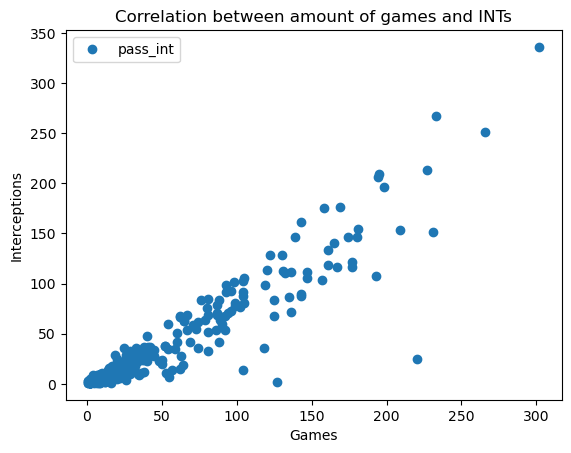

In [12]:
filtered_df = df[(df['pass_int'] != 0) & (df['pos'] == 'QB')] 
filtered_df.plot(x="g", y="pass_int", style = "o")
plt.xlabel('Games')
plt.ylabel("Interceptions")
plt.title("Correlation between amount of games and INTs")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

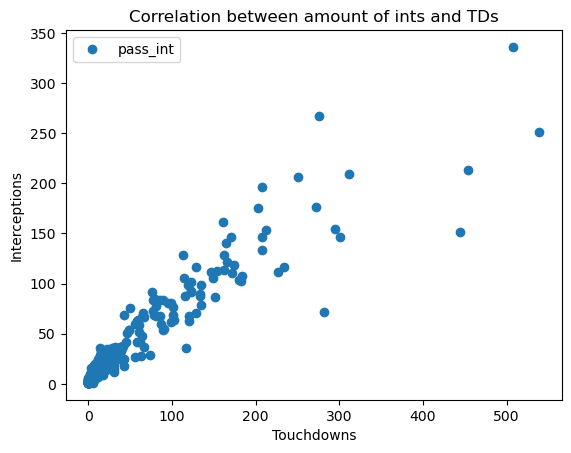

In [13]:
filtered_df = df[(df['pass_int'] != 0) & (df['pos'] == 'QB')] 
filtered_df.plot(x="pass_td", y="pass_int", style = "o")
plt.xlabel('Touchdowns')
plt.ylabel("Interceptions")
plt.title("Correlation between amount of ints and TDs")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

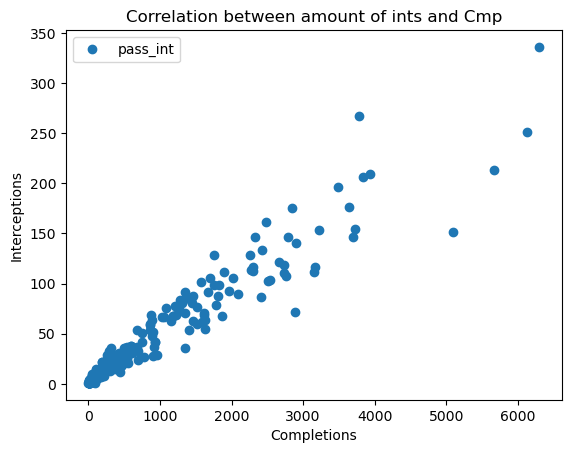

In [14]:
filtered_df = df[(df['pass_int'] != 0) & (df['pos'] == 'QB')] 
filtered_df.plot(x="cmp", y="pass_int", style = "o")
plt.xlabel('Completions')
plt.ylabel("Interceptions")
plt.title("Correlation between amount of ints and Cmp")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

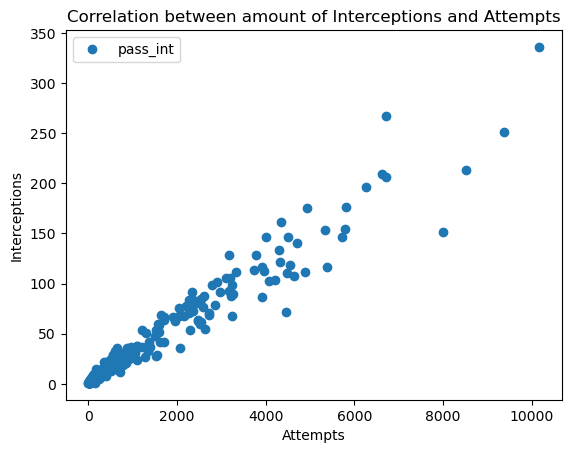

In [15]:
filtered_df = df[(df['pass_int'] != 0) & (df['pos'] == 'QB')] 
filtered_df.plot(x="pass_att", y="pass_int", style = "o")
plt.xlabel('Attempts')
plt.ylabel("Interceptions")
plt.title("Correlation between amount of Interceptions and Attempts")
plt.show

# 6

<function matplotlib.pyplot.show(close=None, block=None)>

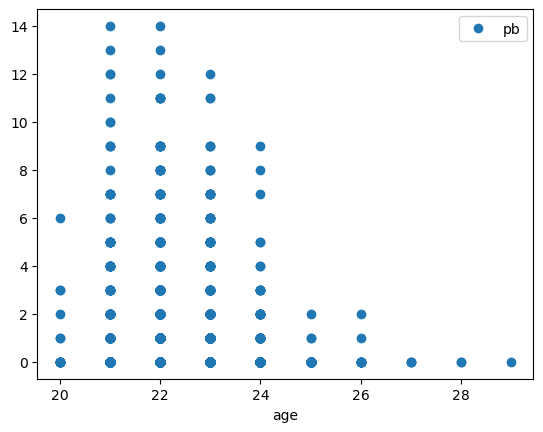

In [16]:
df.plot(x="age", y="pb", style = "o")
plt.show

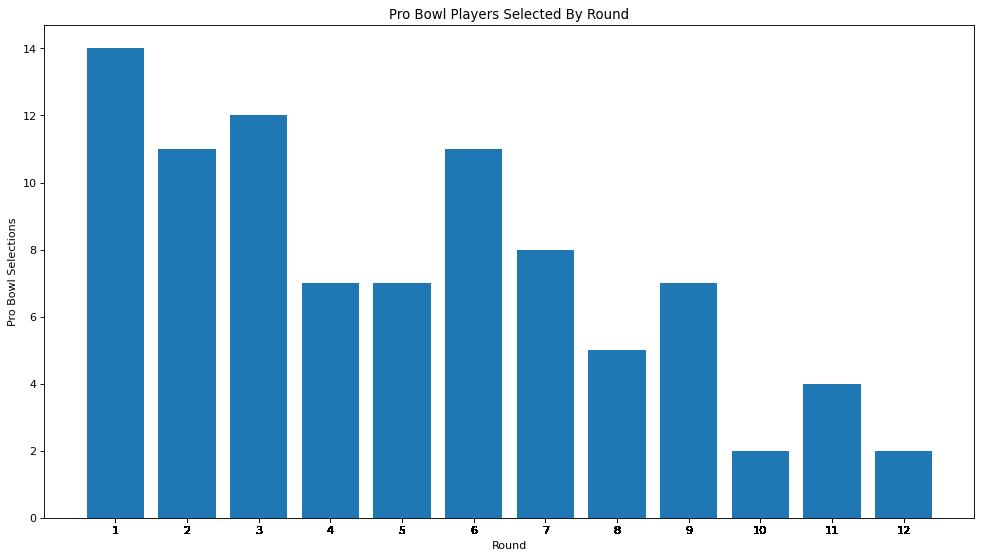

In [17]:
plt.figure(figsize=(15, 8), dpi=80)
plt.title('Pro Bowl Players Selected By Round')
plt.bar(df['rnd'], df['pb'])
plt.xlabel('Round')
plt.ylabel('Pro Bowl Selections')
plt.xticks(df['rnd'])
plt.show()

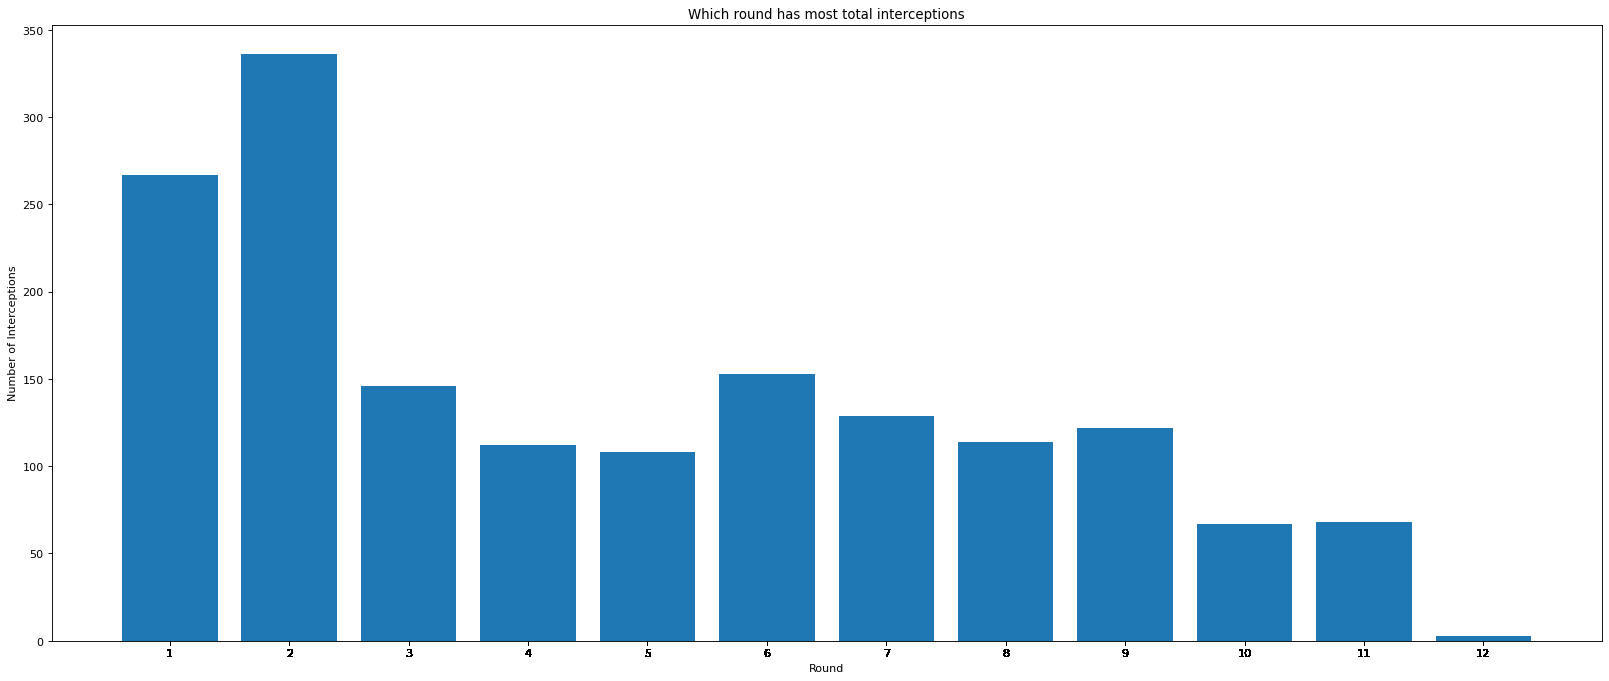

In [18]:
plt.figure(figsize=(25, 10), dpi=80)
plt.title('Which round has most total interceptions')
plt.bar(df['rnd'], df['pass_int'])
plt.xlabel('Round')
plt.ylabel('Number of Interceptions')
#labels all the numbers at the bottom of graph
plt.xticks(df['rnd'])
plt.show()

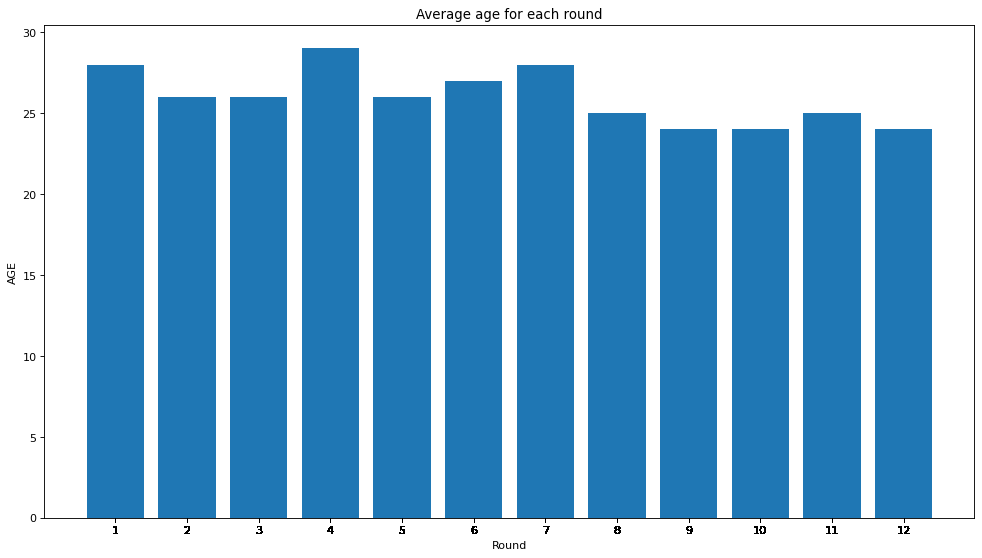

In [19]:
plt.figure(figsize=(15, 8), dpi=80)
plt.title('Average age for each round')
plt.bar(df['rnd'], df['age'])
plt.xlabel('Round')
plt.ylabel('AGE')
plt.xticks(df['rnd'])
plt.show()

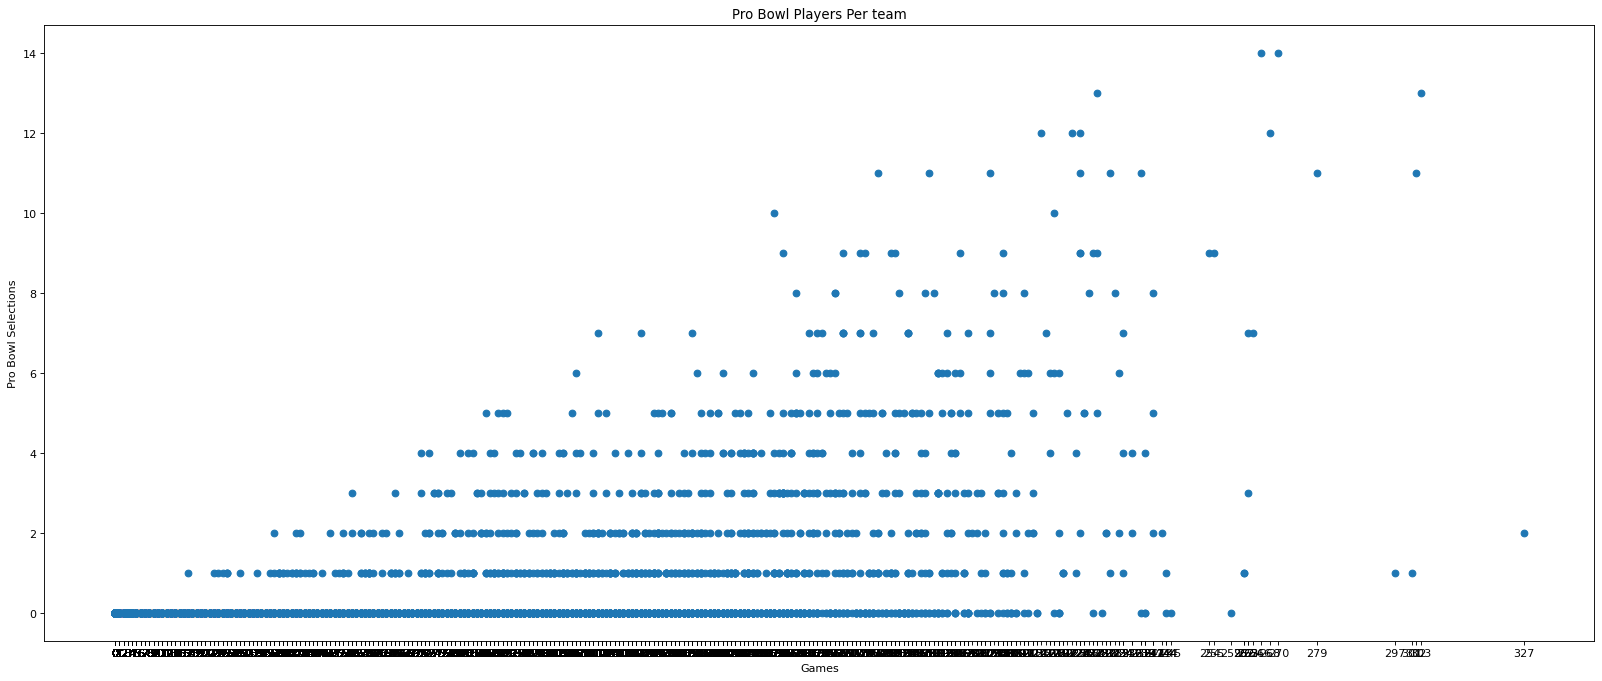

In [20]:
plt.figure(figsize=(25, 10), dpi=80)
plt.title('Pro Bowl Players Per team')
plt.scatter(df['g'], df['pb'])
plt.xlabel('Games')
plt.ylabel('Pro Bowl Selections')
plt.xticks(df['g'])
plt.show()

/var/folders/ns/nj97w2nd7091k37cp21s1y6c0000gn/T/ipykernel_8045/609833679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()   #create a correlation matrix


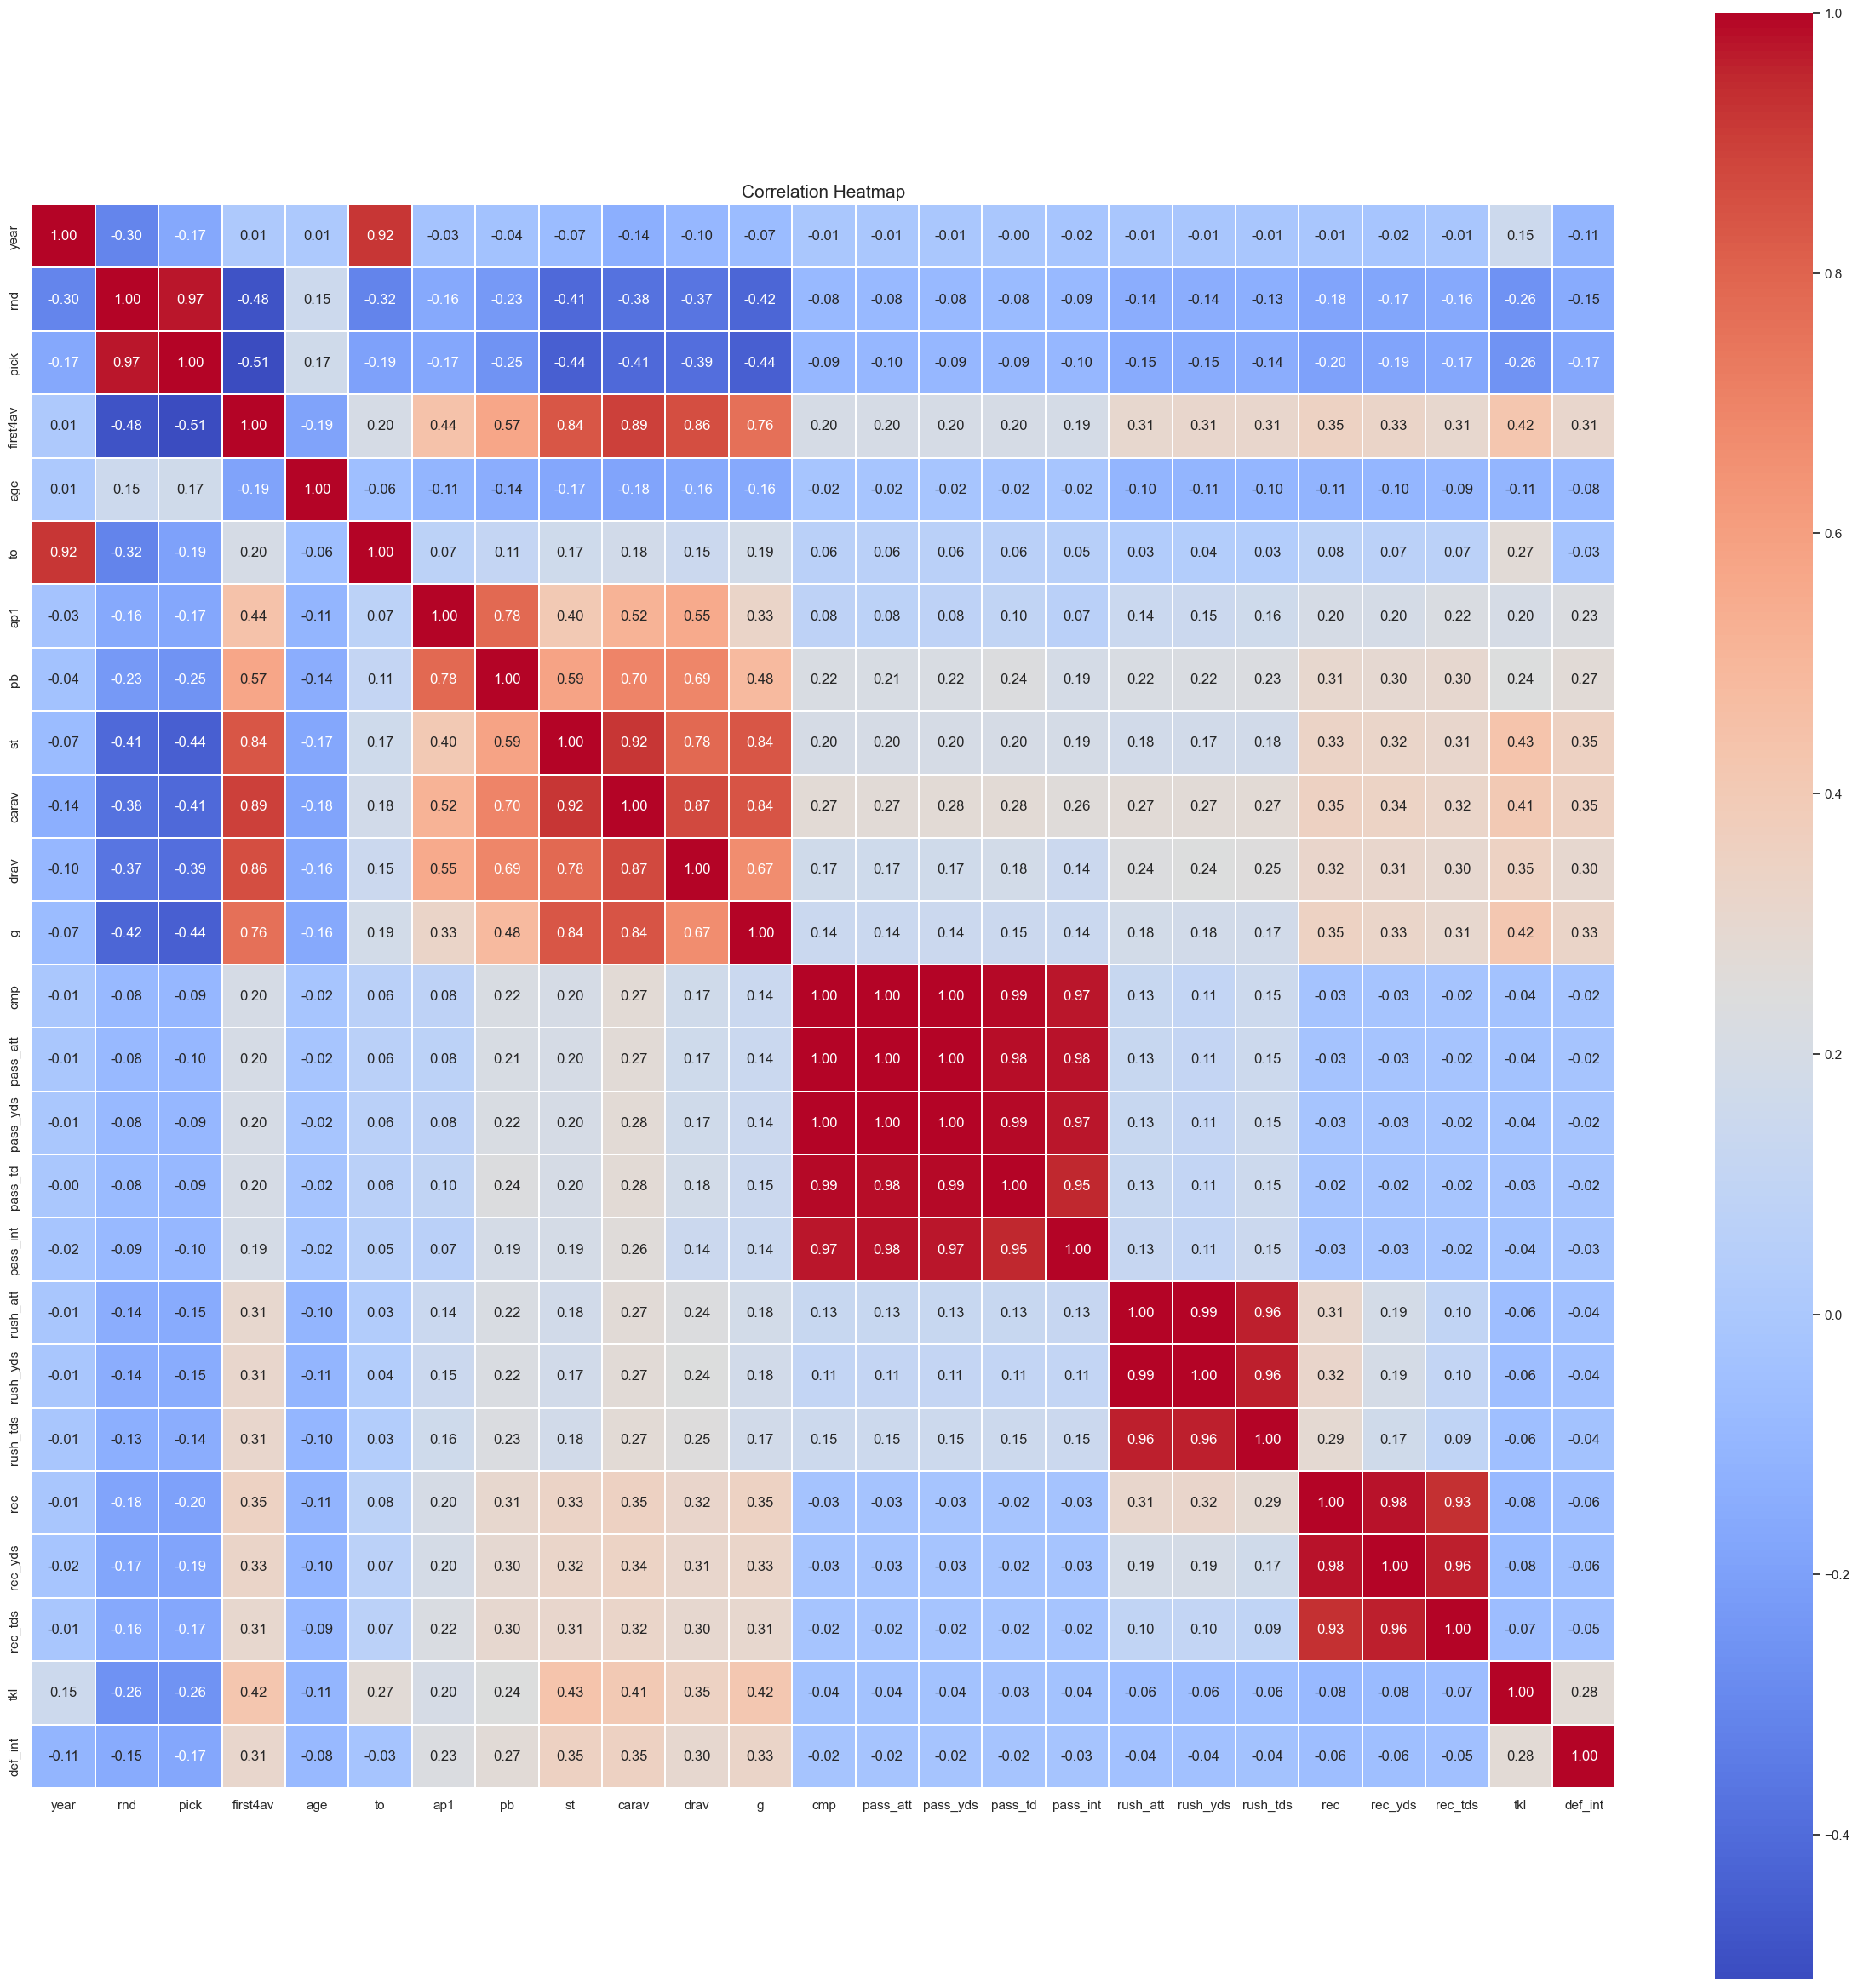

In [22]:
import seaborn as sns
corrMatrix = df.corr()   #create a correlation matrix 

plt.figure(figsize=(30, 30))   #heatmap size
sns.set(font_scale=1)  #heatmap font size
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.10, square=True) #create heatmap
plt.title("Correlation Heatmap", fontsize=15)  #heatmap title
plt.show()  #show heatmap

In [23]:
columns_to_drop = ['age', 'first4av','pick','rnd','year','st','carav','rush_att','rush_yds','rush_tds','rec','rec_yds','rec_tds']
df1 = df.drop(columns=columns_to_drop)


/var/folders/ns/nj97w2nd7091k37cp21s1y6c0000gn/T/ipykernel_8045/4153301492.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df1.corr()   #create a correlation matrix


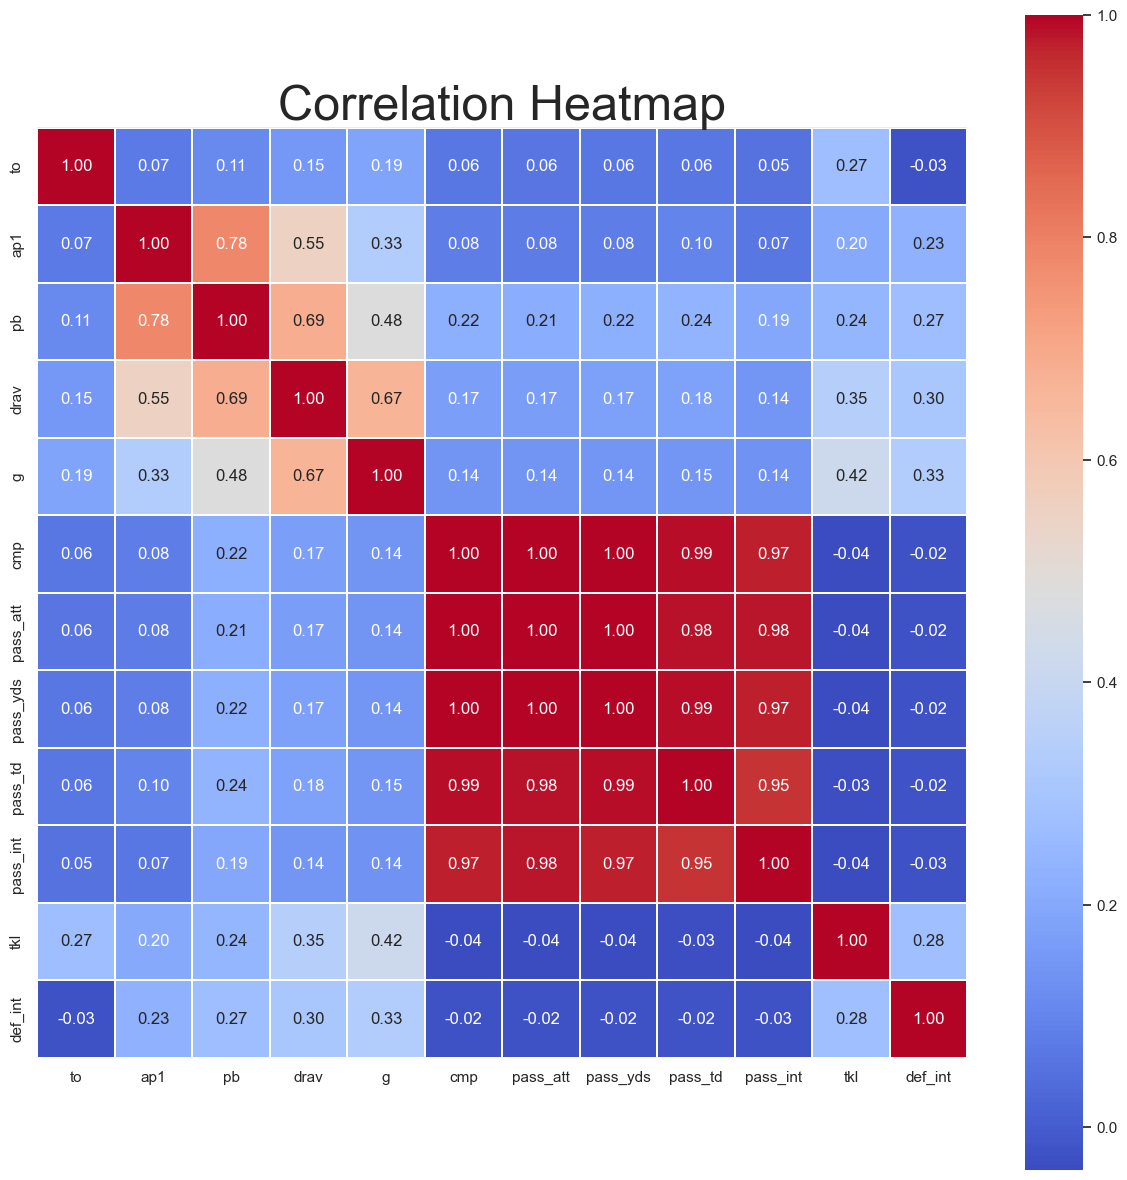

In [24]:
corrMatrix = df1.corr()   #create a correlation matrix 

plt.figure(figsize=(15, 15))   #heatmap size
sns.set(font_scale=1)  #heatmap font size
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.10, square=True) #create heatmap
plt.title("Correlation Heatmap", fontsize=35)  #heatmap title
plt.show()  #show heatmap

Mean Squared Error: 5.4072247648602065
R-Squard: 0.9649639367628857


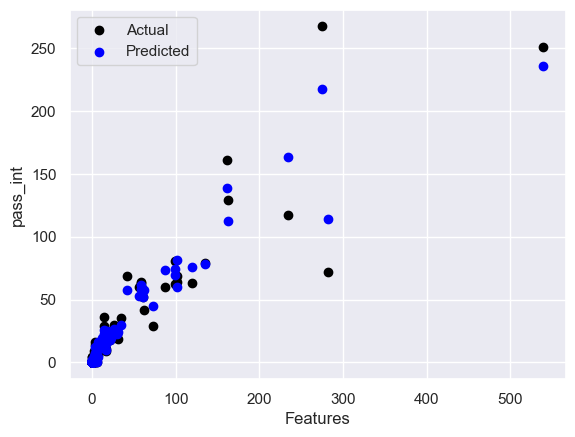

In [25]:
features = ['pass_td','g','pass_yds','cmp','pass_att']
target = 'pass_int'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-Squard: {r2}')

plt.scatter(X_test['pass_td'], y_test, color='black', label='Actual')
plt.scatter(X_test['pass_td'], y_pred, color='blue', label='Predicted')
plt.xlabel('Features')
plt.ylabel('pass_int')
plt.legend()
plt.show()